In [1]:
import torch

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


In [3]:
cuda = torch.device('cuda')

In [4]:
!wget https://github.com/matinfazel/Tumor-Classification/raw/main/Tumor.zip

--2023-12-29 12:41:56--  https://github.com/matinfazel/Tumor-Classification/raw/main/Tumor.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/matinfazel/Tumor-Classification/main/Tumor.zip [following]
--2023-12-29 12:41:56--  https://raw.githubusercontent.com/matinfazel/Tumor-Classification/main/Tumor.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14338568 (14M) [application/zip]
Saving to: ‘Tumor.zip’

Tumor.zip           100%[===================>]  13.67M  --.-KB/s    in 0.1s    

2023-12-29 12:41:56 (101 MB/s) - ‘Tumor.zip’ saved [14338568/14338568]



In [5]:
!unzip /content/Tumor.zip

Archive:  /content/Tumor.zip
   creating: Brain_Tumor/
  inflating: Brain_Tumor/Image1.jpg  
  inflating: Brain_Tumor/Image10.jpg  
  inflating: Brain_Tumor/Image100.jpg  
  inflating: Brain_Tumor/Image1000.jpg  
  inflating: Brain_Tumor/Image1001.jpg  
  inflating: Brain_Tumor/Image1002.jpg  
  inflating: Brain_Tumor/Image1003.jpg  
  inflating: Brain_Tumor/Image1004.jpg  
  inflating: Brain_Tumor/Image1005.jpg  
  inflating: Brain_Tumor/Image1006.jpg  
  inflating: Brain_Tumor/Image1007.jpg  
  inflating: Brain_Tumor/Image1008.jpg  
  inflating: Brain_Tumor/Image1009.jpg  
  inflating: Brain_Tumor/Image101.jpg  
  inflating: Brain_Tumor/Image1010.jpg  
  inflating: Brain_Tumor/Image1011.jpg  
  inflating: Brain_Tumor/Image1012.jpg  
  inflating: Brain_Tumor/Image1013.jpg  
  inflating: Brain_Tumor/Image1014.jpg  
  inflating: Brain_Tumor/Image1015.jpg  
  inflating: Brain_Tumor/Image1016.jpg  
  inflating: Brain_Tumor/Image1017.jpg  
  inflating: Brain_Tumor/Image1018.jpg  
  inflati

In [6]:
from torchvision import transforms
import os
from PIL import Image
import numpy as np
import pandas as pds
from torch.utils.data import DataLoader,TensorDataset,random_split

############################################################## Loading Data
n = 3762
image=[]
cw = os.getcwd().replace(os.sep, '/')
trans = transforms.Compose([transforms.ToTensor()])
for i in range(n):
#    image.append(np.asarray(Image.open(cw + "/Brain_Tumor/Image" + str(i+1) + ".jpg")))
    image.append(np.array(Image.open(cw + "/Brain_Tumor/Image" + str(i+1) + ".jpg").resize((48,48))))

temp = pds.read_csv(cw + "/Brain_Tumor.csv",index_col=None, header=None).to_numpy()
temp = temp[1:,1]
targets = np.zeros((n,1),dtype=int)
targets = []
for i in range(n):
    targets.append(int(temp[i]))

data = np.array(image)
data = data/255
data = torch.from_numpy(data).permute((0,3,2,1))
data = data.float().to(cuda)
targets = torch.tensor(targets).to(cuda)
dataset = TensorDataset(data,targets)
batch_size = 4
val_size = int(np.ceil(len(dataset)*0.2))
train_size = len(dataset) - val_size

train_data,test_data = random_split(dataset,[train_size,val_size])

#start your code
train_loader = DataLoader(train_data, batch_size)        #Put the train data into a data loader
test_loader = DataLoader(test_data, batch_size)          #Put the train data into a data loader
# end

In [7]:
import matplotlib.pyplot as plt
from torchvision import transforms

count of data: 3009
Feature batch shape: torch.Size([4, 3, 48, 48])
Labels batch shape: torch.Size([4])


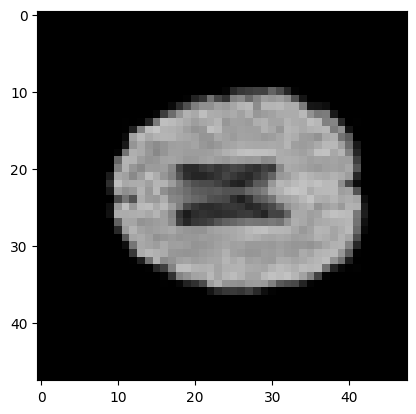

Label: 0


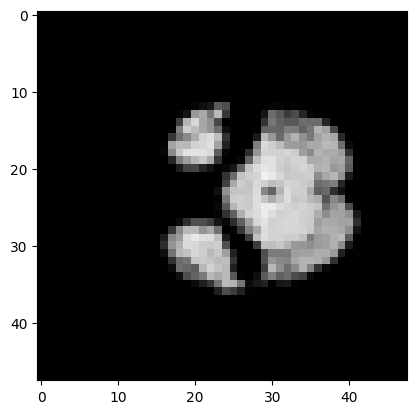

Label: 0


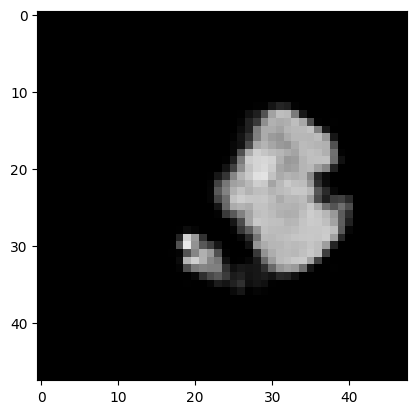

Label: 0


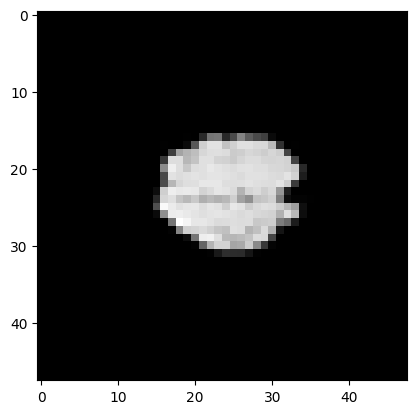

Label: 0


In [8]:
print("count of data:", len(train_data))
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

for i in range(batch_size):
    img = train_features[i].squeeze()
    label = train_labels[i]
    im = transforms.ToPILImage()(img).convert("RGB")
    plt.imshow(im)
    plt.show()
    print(f"Label: {label}")

In [9]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        #start your code
        self.flat = nn.Flatten()                # flatten
        # end

        self.linear_relu_stack = nn.Sequential(
            # your code
            nn.Linear(6912, 512),
            nn.ReLU(),
            nn.Linear(512, 24),
            nn.ReLU(),
            nn.Linear(24, 2),
            # end
        )

    def forward(self, x):
        #start your code
        x = self.flat(x) # flatten
        logits =  self.linear_relu_stack(x)# linear_relu_satck
        # end
        return logits

In [10]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=6912, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=2, bias=True)
  )
)


In [11]:
learning_rate = 1e-3
batch_size = 64
epochs = 100

# your code
loss_fn = nn.CrossEntropyLoss() # CrossEntropy

optimizer = torch.optim.SGD(model.parameters(), learning_rate) # SGD
# end

In [12]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        #start your code
        #prediction
        pred = model(X)
        #loss
        loss = loss_fn(pred, y)

        #loss optimizer
        optimizer.zero_grad()
        #backward
        loss.backward()
        #step
        optimizer.step()
        #end
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

losses=[]
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss_fn, optimizer)
    loss = test_loop(test_loader, model, loss_fn)
    losses.append(loss)
print("Done!")

Epoch 1
-------------------------------
loss: 0.621652  [    0/ 3009]
loss: 0.697550  [  400/ 3009]
loss: 0.713624  [  800/ 3009]
loss: 0.610676  [ 1200/ 3009]
loss: 0.671221  [ 1600/ 3009]
loss: 0.535098  [ 2000/ 3009]
loss: 0.533420  [ 2400/ 3009]
loss: 0.543461  [ 2800/ 3009]
Test Error: 
 Accuracy: 72.2%, Avg loss: 0.576543 

Epoch 2
-------------------------------
loss: 0.523759  [    0/ 3009]
loss: 0.508917  [  400/ 3009]
loss: 0.651277  [  800/ 3009]
loss: 0.498586  [ 1200/ 3009]
loss: 0.582383  [ 1600/ 3009]
loss: 0.359679  [ 2000/ 3009]
loss: 0.402158  [ 2400/ 3009]
loss: 0.422145  [ 2800/ 3009]
Test Error: 
 Accuracy: 73.3%, Avg loss: 0.514956 

Epoch 3
-------------------------------
loss: 0.526007  [    0/ 3009]
loss: 0.372493  [  400/ 3009]
loss: 0.630005  [  800/ 3009]
loss: 0.432400  [ 1200/ 3009]
loss: 0.536562  [ 1600/ 3009]
loss: 0.280843  [ 2000/ 3009]
loss: 0.357986  [ 2400/ 3009]
loss: 0.396138  [ 2800/ 3009]
Test Error: 
 Accuracy: 74.2%, Avg loss: 0.497091 

Epoc

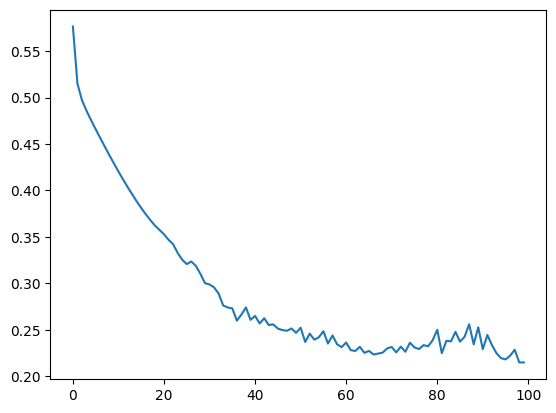

In [14]:
plt.plot(np.arange(0,100), losses)

In [15]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super(NeuralNetwork2, self).__init__()
        self.stack = nn.Sequential(
            #start your code
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(36864, 512),
            nn.ReLU(),
            nn.Linear(512, 24),
            nn.ReLU(),
            nn.Linear(24, 2),
            # end
        )

    def forward(self, x):
        logits = self.stack(x)
        return logits

In [16]:
model2 = NeuralNetwork2().to(cuda)
print(model2)

NeuralNetwork2(
  (stack): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=36864, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=24, bias=True)
    (9): ReLU()
    (10): Linear(in_features=24, out_features=2, bias=True)
  )
)


In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)

losses=[]
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model2, loss_fn, optimizer)
    loss = test_loop(test_loader, model2, loss_fn)
    losses.append(loss)
print("Done!")

Epoch 1
-------------------------------
loss: 0.605500  [    0/ 3009]
loss: 0.739516  [  400/ 3009]
loss: 0.768408  [  800/ 3009]
loss: 0.603548  [ 1200/ 3009]
loss: 0.754623  [ 1600/ 3009]
loss: 0.625499  [ 2000/ 3009]
loss: 0.625083  [ 2400/ 3009]
loss: 0.652825  [ 2800/ 3009]
Test Error: 
 Accuracy: 57.5%, Avg loss: 0.651359 

Epoch 2
-------------------------------
loss: 0.569745  [    0/ 3009]
loss: 0.660538  [  400/ 3009]
loss: 0.711229  [  800/ 3009]
loss: 0.564795  [ 1200/ 3009]
loss: 0.665590  [ 1600/ 3009]
loss: 0.488479  [ 2000/ 3009]
loss: 0.512032  [ 2400/ 3009]
loss: 0.490476  [ 2800/ 3009]
Test Error: 
 Accuracy: 71.2%, Avg loss: 0.544782 

Epoch 3
-------------------------------
loss: 0.503211  [    0/ 3009]
loss: 0.419163  [  400/ 3009]
loss: 0.631329  [  800/ 3009]
loss: 0.475785  [ 1200/ 3009]
loss: 0.554377  [ 1600/ 3009]
loss: 0.295692  [ 2000/ 3009]
loss: 0.407058  [ 2400/ 3009]
loss: 0.387553  [ 2800/ 3009]
Test Error: 
 Accuracy: 74.0%, Avg loss: 0.492814 

Epoc

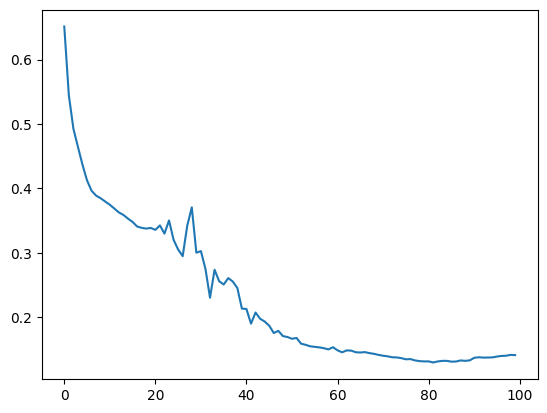

In [18]:
plt.plot(np.arange(0,100),losses)

In [19]:
!pip install wandb
import wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
# wandb.login()
wandb.init(project='ci-lab-9')

In [21]:
sweep_configuration = {
    "method": "random",
}

In [22]:
metric = {
    'name': 'loss',
    'goal': 'minimize'
    }

sweep_configuration['metric'] = metric

In [23]:
parameters_dict = {
    'learning_rate': {
        'distribution': 'uniform',
        'min': 0,
        'max': 0.1
      },
}

sweep_configuration['parameters'] = parameters_dict

In [ ]:
sweep_id = wandb.sweep(sweep_configuration, project="ci-lab-9")


In [25]:
def train(config=None):
    # Initialize a new wandb run
    with wandb.init(config=config):
        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config

        epochs = 100
        train_loader = DataLoader(train_data, batch_size)
        test_loader = DataLoader(test_data, batch_size)

        loss_fn = nn.CrossEntropyLoss() # CrossEntropy
        model2 = NeuralNetwork2().to(cuda)
        optimizer = torch.optim.SGD(model2.parameters(), config.learning_rate) # SGD


        for epoch in range(epochs):
            print(f"Epoch {epoch+1}\n-------------------------------")
            train_loop(train_loader, model2, loss_fn, optimizer)
            loss = test_loop(train_loader, model2, loss_fn)

            wandb.log({"loss": loss})

In [ ]:
wandb.agent(sweep_id, train, count=5)

The error isn't caused by the code being wrong. it is an issue with the connection to wand.<br>
and all the executions ran with no problem and the results are visible in sweep url:

the best learning rate found: 0.06374

so we should use this learning rate to train model. cause this gave us the best result.